# Ruiz Balam Enrique Adrian-20390028

### Realizar una solución dependiendo de cual data sets sea el que corresponde.

1. Coffee Quality, Links:  https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi o https://github.com/fatih-boyar/coffee-quality-data-CQI.git
2. Data Science Salaries 2023, Link: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
3. Diabetes prediction dataset, Link:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
4. Heart Disease, Link: https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset

### Método para seleccionar el problema

Para saber que problema le toca deberá fijarse en su numero de control y tomar el ultimo digo:

1. Si tu número de control termina en 9 o 5 la problemática a resolver es el 1
2. Si tu número de control termina en 8 o 4 la problemática a resolver es la 2
3. Si tu número de control termina en 7 o 3 la problemática a resolver es la 3
4. Si tu número de control termina en 6 o 2 la problemática a resolver es el 4
5. Si tu número de control termina en 0 o 1 tienes libertad para seleccionar cualquiera de los 4 problemas planteados


### Requerimientos de Solucion:
- Poner tunombre y tu numero de control al jupiter y en un celda como Markdown
- Reliazar la exploracion de los datos para entenderlos, pude usar pandas o numpy
- hacer el modelo predictivo
- No olvidar las validaciones que considere necesarias
- Documentar y/o justificar cualquier decisión que tome en su desarrollo.
- Usar el nombre de variables, de funciones, de ciclos y de programas acorde a la problemática.
- Hacer correllaciones, scatters, heatmaps, boxplot, graficas y todo aquellas graficas que permitan mostrar los resultados  



### Modo de entrega
Enviar al correo isaias.mc@chetumal.tecnm.mx la liga del repositorio del proyecto.

#### Fechas de entrega:
-	16 de junio de 2023.


# Understanding the Data

The following is a checklist and a sequence
of things to learn about your data set to familiarize yourself with the data and
to formulate the predictive model development steps that you want to follow:

- Number of rows and columns
- Number of categorical variables and number of unique values for each
- Missing values
- Summary statistics for attributes and labels

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [56]:
df=pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [57]:
df.head()       # Muestra las primeras filas del conjunto de datos
df.info()       # Proporciona información sobre las columnas y los tipos de datos
df.describe()  # Calcula estadísticas descriptivas del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [58]:
# Manejar valores faltantes si los hay
df = df.dropna()

# Separar características y variable objetivo
X = df.drop('salary', axis=1)   # Ajusta las columnas relevantes
y = df['salary']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Codificar variables categóricas utilizando one-hot encoding
X_encoded = pd.get_dummies(X)

# Separar características codificadas y variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Número de filas y columnas
num_rows, num_cols = df.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)

Número de filas: 3755
Número de columnas: 11


In [63]:
# Número de variables categóricas y valores únicos para cada una
categorical_vars = df.select_dtypes(include="object").columns
num_unique_values = df[categorical_vars].nunique()
print("Número de variables categóricas:", len(categorical_vars))
print("Número de valores únicos para cada variable categórica:")
print(num_unique_values)

Número de variables categóricas: 7
Número de valores únicos para cada variable categórica:
experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
company_location      72
company_size           3
dtype: int64


In [64]:
# Valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes:")
print(missing_values)

Valores faltantes:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [65]:
# Estadísticas resumidas para atributos y etiquetas
summary_stats_attributes = df.describe(include="all")
summary_stats_labels = df["salary"].describe()
print("Estadísticas resumidas para atributos:")
print(summary_stats_attributes)
print("Estadísticas resumidas para etiquetas:")
print(summary_stats_labels)

Estadísticas resumidas para atributos:
          work_year experience_level employment_type      job_title  \
count   3755.000000             3755            3755           3755   
unique          NaN                4               4             93   
top             NaN               SE              FT  Data Engineer   
freq            NaN             2516            3718           1040   
mean    2022.373635              NaN             NaN            NaN   
std        0.691448              NaN             NaN            NaN   
min     2020.000000              NaN             NaN            NaN   
25%     2022.000000              NaN             NaN            NaN   
50%     2022.000000              NaN             NaN            NaN   
75%     2023.000000              NaN             NaN            NaN   
max     2023.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   3.755000e+03            37

## Metricas para medir el desempeño de los modelos
- Mean squared error - Error cuadratico medio: $MSE= \frac{1}{m}\sum_{i=1}^{m}(x_{i}-pred(x_{i}))^{2} $
- Mean absolute error- Error obsoluto medio: $MAE=\frac{1}{m}\sum_{i=1}^{m}|x_{i}-pred(x_{i})|$ 

In [66]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 2.0293174063545713e+18


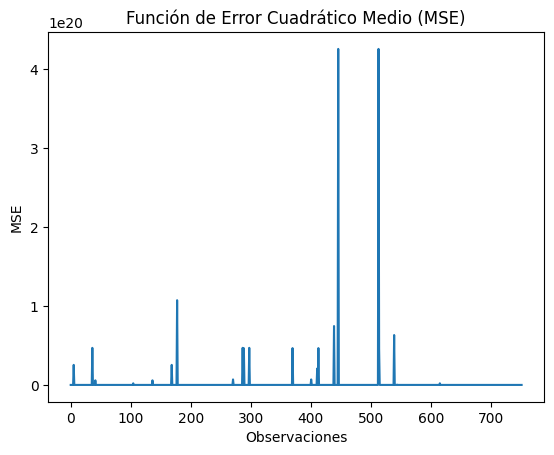

In [67]:
# Calcula el MSE
mse = mean_squared_error(y_test, y_pred)

# Graficar la función de error cuadrático medio (MSE)
x = np.linspace(0, len(y_test), len(y_test))
plt.plot(x, (y_test - y_pred) ** 2)
plt.xlabel('Observaciones')
plt.ylabel('MSE')
plt.title('Función de Error Cuadrático Medio (MSE)')
plt.show()

In [68]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 192375409.9444295


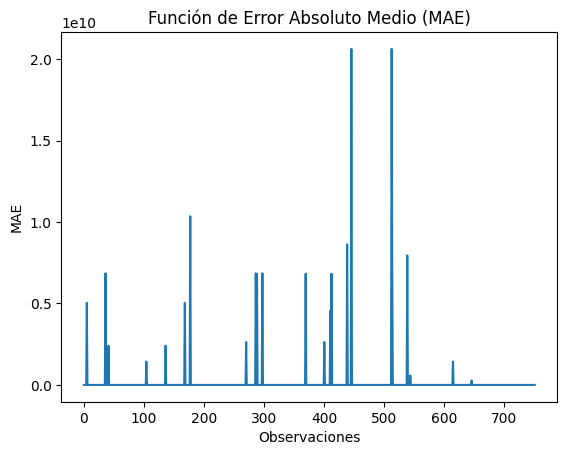

MAE: 192375409.9444295


In [69]:
# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Graficar la función de Error Absoluto Medio (MAE)
x = np.linspace(0, len(y_test), len(y_test))
plt.plot(x, np.abs(y_test - y_pred))
plt.xlabel('Observaciones')
plt.ylabel('MAE')
plt.title('Función de Error Absoluto Medio (MAE)')
plt.show()

print("MAE:", mae)

## LassoCV demo with data normalization and no normalization

In [70]:
def convert_string_to_float(df, default_value=0):
    # Obtener la lista de columnas
    columns = df.columns

    # Iterar sobre las columnas y convertir los valores de cadena a float
    for column in columns:
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
            df[column] = df[column].fillna(default_value)
        except ValueError:
            # Si ocurre un error, significa que la columna no se puede convertir a float
            # Imputar un valor predeterminado en lugar de los valores no numéricos
            df[column] = default_value

    return df

In [71]:
# Convertir los strings a float e imputar un valor predeterminado de -1
df = convert_string_to_float(df, default_value=-1)

In [72]:
# Separar las características y la variable objetivo
X = df.drop("salary", axis=1)
y = df["salary"]

In [73]:
# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [74]:
# Crear el modelo LassoCV con normalización
lasso_cv_normalized = LassoCV(cv=5)
lasso_cv_normalized.fit(X_normalized, y)

# Mostrar los coeficientes del modelo con normalización
coef_normalized = lasso_cv_normalized.coef_
print("Coeficientes del modelo LassoCV con normalización:")
print(coef_normalized)

Coeficientes del modelo LassoCV con normalización:
[-12014.97583364      0.              0.              0.
      0.             -0.              0.              0.
      0.              0.        ]


In [76]:
# Crear el modelo LassoCV sin normalización
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X, y)

# Mostrar los coeficientes del modelo sin normalización
coef = lasso_cv.coef_
print("Coeficientes del modelo LassoCV sin normalización:")
print(coef)

Coeficientes del modelo LassoCV sin normalización:
[-0.  0.  0.  0.  0. -0.  0.  0.  0.  0.]


In [77]:
# Aplicar normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo LassoCV
model_normalized = LassoCV(cv=5)
model_normalized.fit(X_train_scaled, y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred_normalized = model_normalized.predict(X_test_scaled)

# Calcular el MAE con normalización
mae_normalized = mean_absolute_error(y_test, y_pred_normalized)
print("MAE con normalización:", mae_normalized)

MAE con normalización: 64558.8343292114


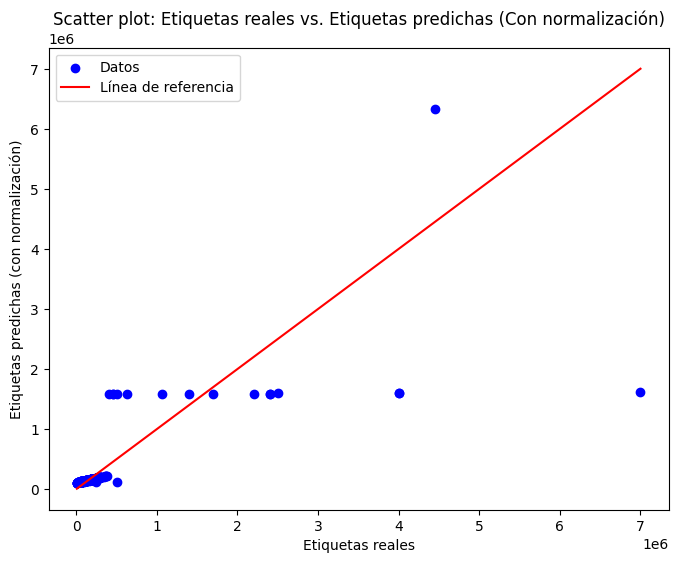

In [91]:
# Graficar un scatter plot de las etiquetas reales y predichas con normalización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_normalized, color='b', label='Datos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', label='Línea de referencia')
plt.xlabel("Etiquetas reales")
plt.ylabel("Etiquetas predichas (con normalización)")
plt.title("Scatter plot: Etiquetas reales vs. Etiquetas predichas (Con normalización)")
plt.legend()
plt.show()

In [78]:
# Crear el modelo LassoCV sin normalización
model_unnormalized = LassoCV(cv=5)
model_unnormalized.fit(X_train, y_train)

# Obtener las predicciones en el conjunto de prueba sin normalización
y_pred_unnormalized = model_unnormalized.predict(X_test)

# Calcular el MAE sin normalización
mae_unnormalized = mean_absolute_error(y_test, y_pred_unnormalized)
print("MAE sin normalización:", mae_unnormalized)

MAE sin normalización: 112958.35537702948


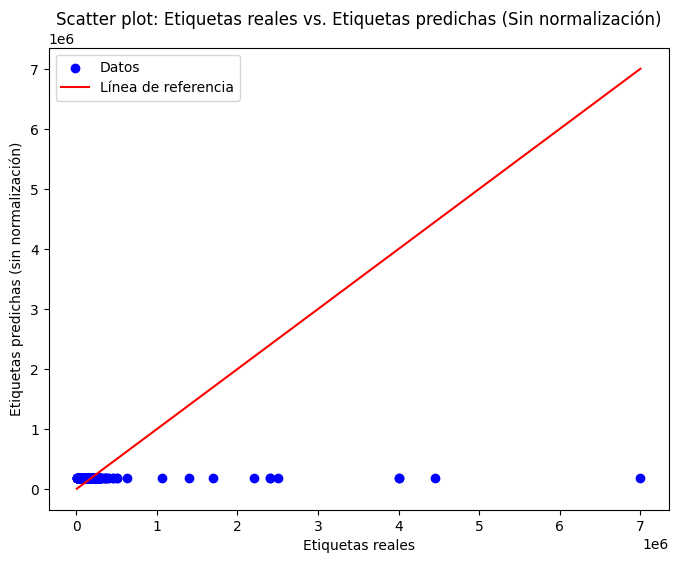

In [92]:
# Graficar un scatter plot de las etiquetas reales y predichas sin normalización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_unnormalized, color='b', label='Datos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', label='Línea de referencia')
plt.xlabel("Etiquetas reales")
plt.ylabel("Etiquetas predichas (sin normalización)")
plt.title("Scatter plot: Etiquetas reales vs. Etiquetas predichas (Sin normalización)")
plt.legend()
plt.show()

### Lasso Training on Full Data Set

In [83]:
def convert_string_to_float(df, default_value=0):
    # Obtener la lista de columnas
    columns = df.columns

    # Iterar sobre las columnas y convertir los valores de cadena a float
    for column in columns:
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
            df[column] = df[column].fillna(default_value)
        except ValueError:
            # Si ocurre un error, significa que la columna no se puede convertir a float
            # Imputar un valor predeterminado en lugar de los valores no numéricos
            df[column] = default_value

    return df

In [84]:
# Convertir los strings a float e imputar un valor predeterminado de -1
df = convert_string_to_float(df, default_value=-1)

In [85]:
# Separar las características y la variable objetivo
X = df.drop("salary", axis=1)
y = df["salary"]

In [86]:
# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [87]:
# Crear y ajustar el modelo Lasso con el conjunto de datos completo
lasso_model = Lasso()
lasso_model.fit(X_normalized, y)

Lasso()

In [88]:
# Mostrar los coeficientes del modelo entrenado en el conjunto de datos completo
coef = lasso_model.coef_
print("Coeficientes del modelo Lasso entrenado en el conjunto de datos completo:")
print(coef)

Coeficientes del modelo Lasso entrenado en el conjunto de datos completo:
[-62232.21230615      0.              0.              0.
      0.          -1404.27367462      0.           4490.60108519
      0.              0.        ]


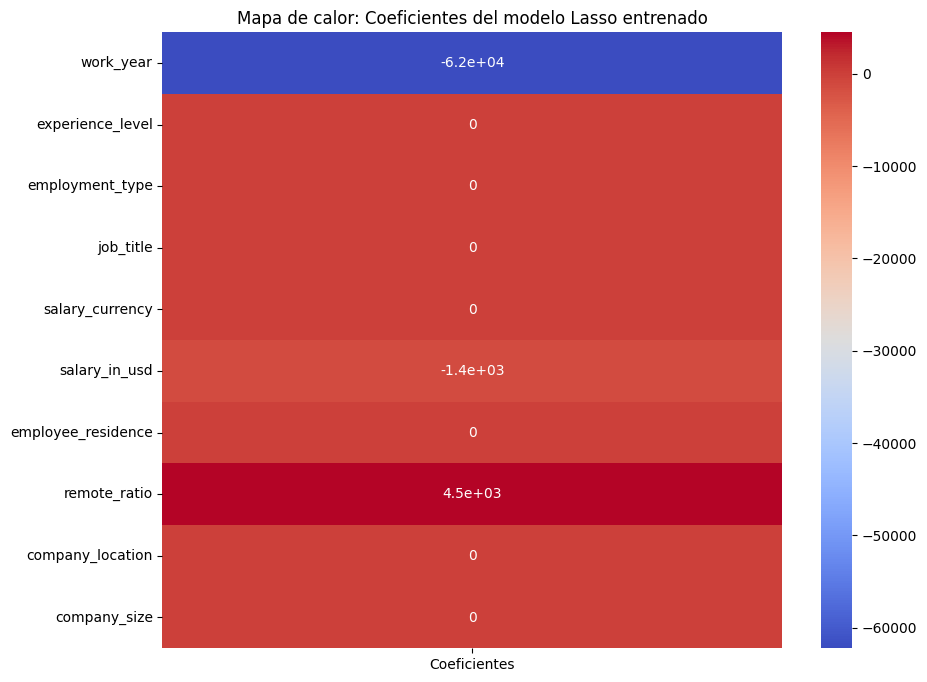

In [93]:
# Crear un DataFrame con los coeficientes del modelo
coef_df = pd.DataFrame({'Coeficientes': coef}, index=X.columns)

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(coef_df, annot=True, cmap="coolwarm")
plt.title("Mapa de calor: Coeficientes del modelo Lasso entrenado")
plt.show()